Name    : Rahul Kishor Gaikwad
Roll No : 10
Subject : BI Lab

#                                                      Assignment 2

1) Apply Data Exploration in Python using NumPy, Matplotlib and Pandas with appropriate examples.

In [23]:
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("./data/Iris.csv")

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.shape

(150, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [28]:
data = df.drop_duplicates(subset ="class",)
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [29]:
df.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

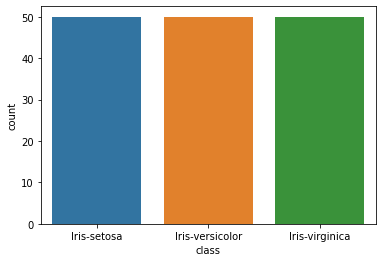

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df, )
plt.show()

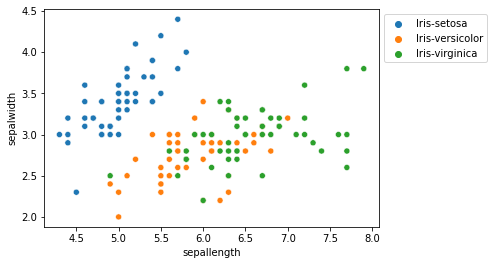

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='sepallength', y='sepalwidth',hue='class', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

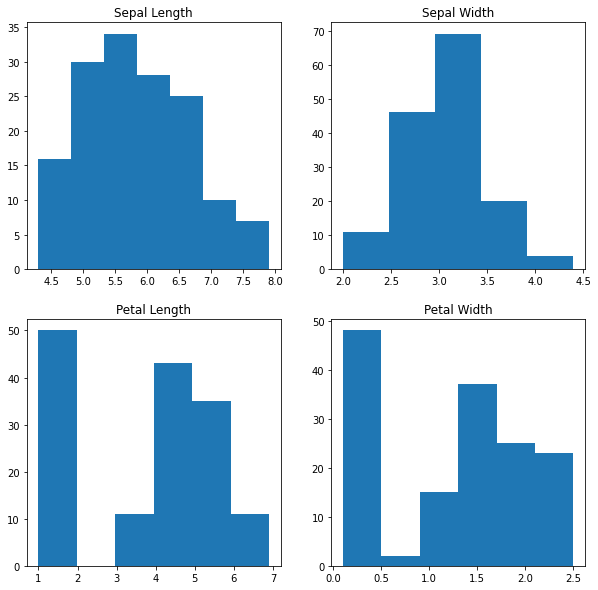

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepallength'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepalwidth'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petallength'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petalwidth'], bins=6);


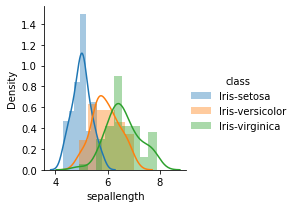

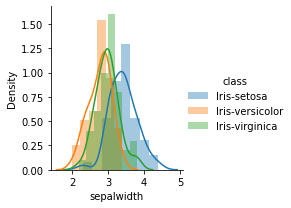

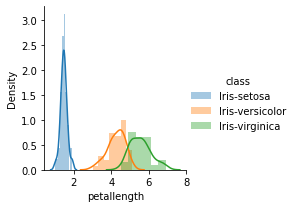

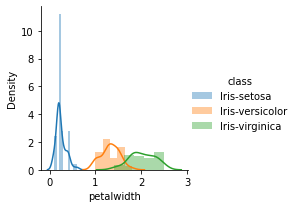

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.FacetGrid(df, hue="class")
plot.map(sns.distplot, "sepallength").add_legend()

plot = sns.FacetGrid(df, hue="class")
plot.map(sns.distplot, "sepalwidth").add_legend()

plot = sns.FacetGrid(df, hue="class")
plot.map(sns.distplot, "petallength").add_legend()

plot = sns.FacetGrid(df, hue="class")
plot.map(sns.distplot, "petalwidth").add_legend()

plt.show()


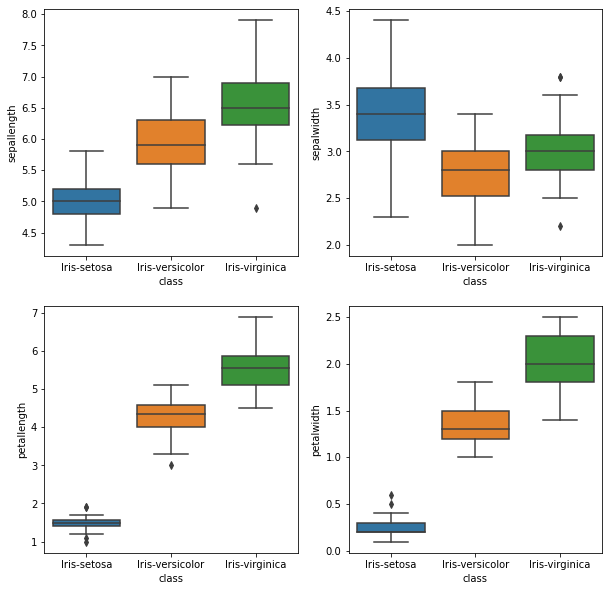

In [36]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
    sns.boxplot(x="class", y=y, data=df)

plt.figure(figsize=(10,10))

plt.subplot(221)
graph('sepallength')

plt.subplot(222)
graph('sepalwidth')

plt.subplot(223)
graph('petallength')

plt.subplot(224)
graph('petalwidth')

plt.show()


<AxesSubplot:xlabel='sepalwidth'>

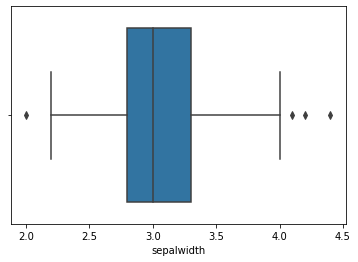

In [38]:

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('./data/Iris.csv')

sns.boxplot(x='sepalwidth', data=df)


Old Shape:  (150, 5)
New Shape:  (146, 5)


<AxesSubplot:xlabel='sepalwidth'>

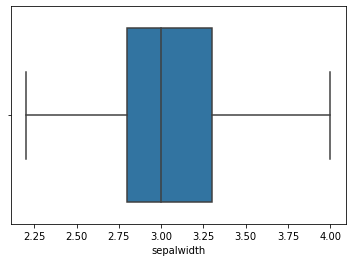

In [42]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('./data/Iris.csv')

Q1 = np.percentile(df['sepalwidth'], 25,interpolation = 'midpoint')

Q3 = np.percentile(df['sepalwidth'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

upper = np.where(df['sepalwidth'] >= (Q3+1.5*IQR))

lower = np.where(df['sepalwidth'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepalwidth', data=df)


2) Discuss various ways of dealing with missing values in Python on any data set with different types of attributes. 

In [46]:
import pandas as pd
import os

data = pd.read_csv("./data/titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1. Deleting Rows

In [51]:
data.dropna(inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 2. Replacing With Mean/Median/Mode

In [57]:
import pandas as pd
import os
import numpy as np
data = pd.read_csv("./data/titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data["Age"].isna().sum()

177

In [59]:
data["Age"].mean()

29.69911764705882

In [60]:
data["Age"].replace(np.NaN,data["Age"].mean()).head(15)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
Name: Age, dtype: float64

In [61]:
data["Age"].replace(np.NaN,data["Age"].median()).head(15)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     28.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

# 3.  Assigning An Unique Category

In [63]:
data["Cabin"].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [64]:
data["Cabin"].fillna("U")

0         U
1       C85
2         U
3      C123
4         U
       ... 
886       U
887     B42
888       U
889    C148
890       U
Name: Cabin, Length: 891, dtype: object

# 4. Predicting The Missing Values

In [81]:
from sklearn.linear_model import LinearRegression

data = pd.read_csv("./data/titanic.csv")

data.head()

linreg = LinearRegression()


In [82]:
data_with_null = data[['PassengerId','Pclass','Survived','SibSp','Parch','Fare','Age']].dropna()
data_with_null

,PassengerId,Pclass,Survived,SibSp,Parch,Fare,Age
0,1,3,0,1,0,7.2500,22.0
1,2,1,1,1,0,71.2833,38.0
2,3,3,1,0,0,7.9250,26.0
3,4,1,1,1,0,53.1000,35.0
4,5,3,0,0,0,8.0500,35.0
...,...,...,...,...,...,...,...
885,886,3,0,0,5,29.1250,39.0
886,887,2,0,0,0,13.0000,27.0
887,888,1,1,0,0,30.0000,19.0
889,890,1,1,0,0,30.0000,26.0


In [83]:
data_without_null = data_with_null.dropna()
data_without_null

,PassengerId,Pclass,Survived,SibSp,Parch,Fare,Age
0,1,3,0,1,0,7.2500,22.0
1,2,1,1,1,0,71.2833,38.0
2,3,3,1,0,0,7.9250,26.0
3,4,1,1,1,0,53.1000,35.0
4,5,3,0,0,0,8.0500,35.0
...,...,...,...,...,...,...,...
885,886,3,0,0,5,29.1250,39.0
886,887,2,0,0,0,13.0000,27.0
887,888,1,1,0,0,30.0000,19.0
889,890,1,1,0,0,30.0000,26.0


In [84]:
train_data_x = data_without_null.iloc[:,:6]

In [85]:
train_data_y = data_without_null.iloc[:,6]

In [86]:
linreg.fit(train_data_x,train_data_x)

LinearRegression()

In [88]:
test_data = data_with_null.iloc[:,:6]

In [91]:
x = pd.DataFrame(linreg.predict(test_data))
x

,0,1,2,3,4,5
0,1.0,3.0,2.608383e-15,1.000000e+00,-5.112140e-14,7.2500
1,2.0,1.0,1.000000e+00,1.000000e+00,7.188519e-14,71.2833
2,3.0,3.0,1.000000e+00,-7.061693e-14,-4.857235e-14,7.9250
3,4.0,1.0,1.000000e+00,1.000000e+00,3.705312e-14,53.1000
4,5.0,3.0,2.556377e-15,-6.980912e-14,-4.894210e-14,8.0500
...,...,...,...,...,...,...
709,886.0,3.0,1.501311e-15,-2.249413e-14,5.000000e+00,29.1250
710,887.0,2.0,2.441649e-15,-6.051738e-14,-4.336685e-14,13.0000
711,888.0,1.0,1.000000e+00,-1.443127e-14,-1.032434e-14,30.0000
712,890.0,1.0,1.000000e+00,-1.444224e-14,-1.033294e-14,30.0000


# 5. Using Algorithms Which Support Missing Values

KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. In this particular dataset, taking into account the person’s age, sex, class etc, we will assume that people having same data for the above mentioned features will have the same kind of fare.

Unfortunately, the SciKit Learn library for the K – Nearest Neighbour algorithm in Python does not support the presence of the missing values.

Another algorithm which can be used here is RandomForest. This model produces a robust result because it works well on non-linear and the categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

Pros:
1. Does not require creation of a predictive model for each attribute with missing data in the dataset
2. Correlation of the data is neglected

Cons:
1. Is a very time consuming process and it can be critical in data mining where large databases are being extracted
2. Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result

3) Construct a decision tree in any BI tool on any dataset data set of your choice.



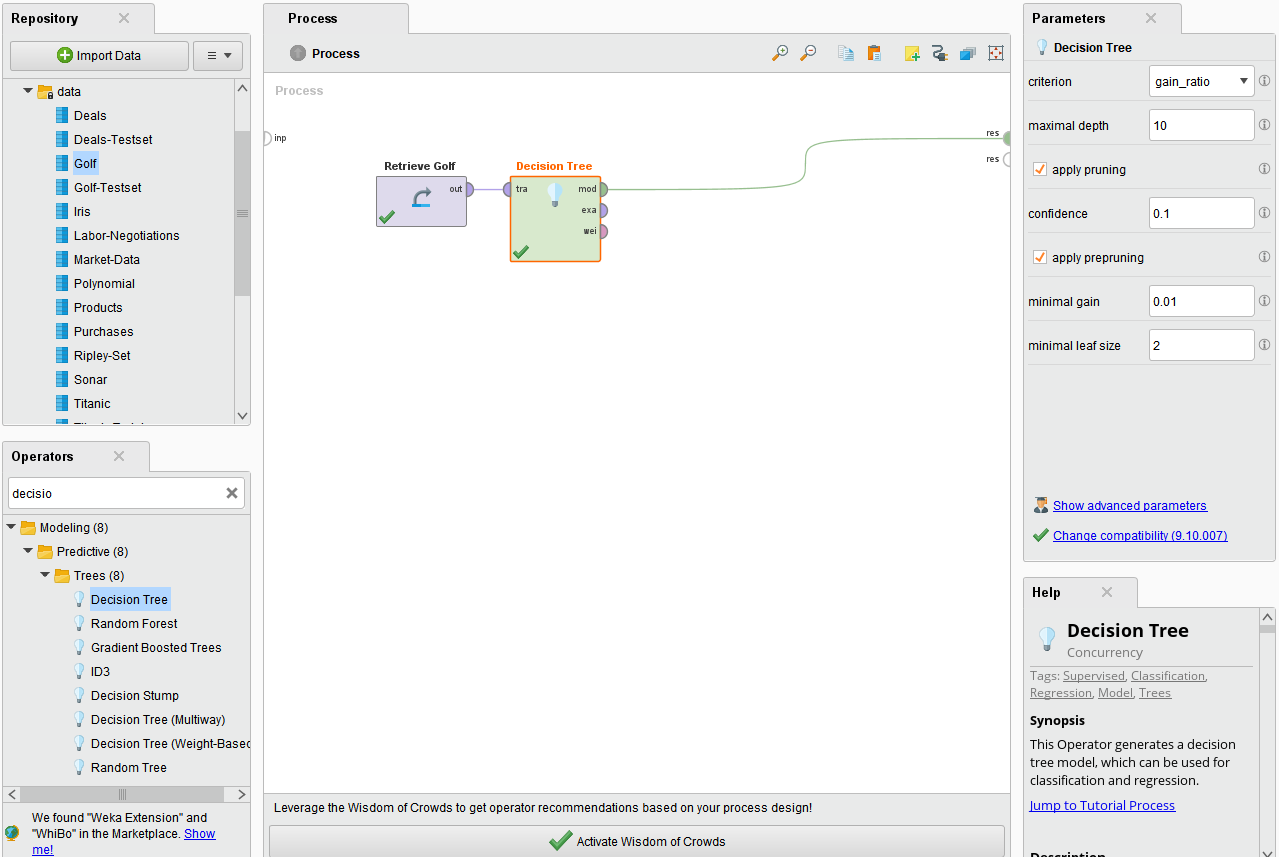

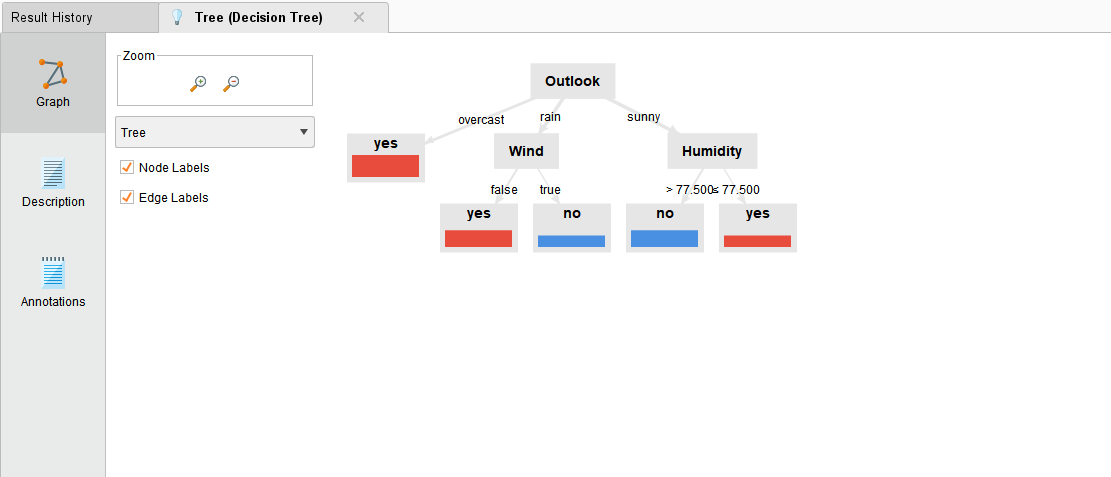

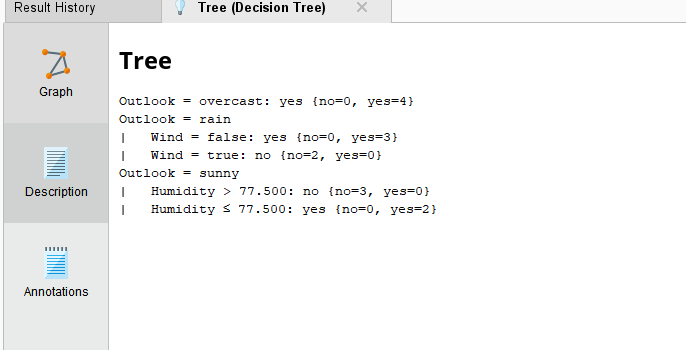

